In [2]:
import pandas as pd
import numpy as np
import os
import threading
import time
import sys
from utils import utils
import copy
from matplotlib import pyplot as plt
import numpy as np
import random
np.random.seed(1234)
random.seed(1234)

routing:  RoundRobin-LCLB
routing:  RoundRobin-MCLB
routing:  RoundRobin-heuristic_TE
['three_depth', 'RoundRobin-LCLB', 'resource_provisioing_log-clsuter_0.csv']
total_usage A: 710000000.0
total_usage B: 907500000.0
total_usage C: 903000000.0
total_usage D: 908625000.0
total_usage E: 1008333333.3333334
total_usage F: 1073500000.0
['three_depth', 'RoundRobin-MCLB', 'resource_provisioing_log-clsuter_0.csv']
total_usage A: 496333333.3333333
total_usage B: 563000000.0
total_usage C: 554200000.0
total_usage D: 557375000.0
total_usage E: 558500000.0
total_usage F: 563000000.0
['three_depth', 'RoundRobin-heuristic_TE', 'resource_provisioing_log-clsuter_0.csv']
total_usage A: 695500000.0000001
total_usage B: 901500000.0
total_usage C: 880800000.0
total_usage D: 870875000.0
total_usage E: 884333333.3333333
total_usage F: 882500000.0
c0_values[routing]:  [710000000.0, 907500000.0, 903000000.0, 908625000.0, 1008333333.3333334, 1073500000.0]
c0_values[routing]:  [496333333.3333333, 563000000.0, 5

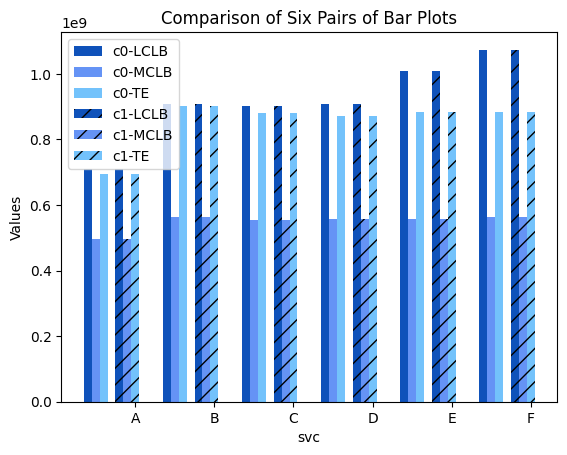

In [43]:
def get_svc_list(f_):
    df = pd.read_csv(f_)
    svc_list = df["service"].unique()
    return svc_list

def calc_resource_usage(files):
    total_capa = dict()
    total_num_replica = dict()
    for routing in files:
        svc_list = get_svc_list(files[routing])
        break
    for svc in svc_list:
        total_capa[svc] = dict()
        for routing in routing_algorithm:
            total_capa[svc][routing] = 0
        total_num_replica[svc] = dict()
        for routing in routing_algorithm:
            total_num_replica[svc][routing] = 0
    for routing in files:
        f_ = files[routing]
        df = pd.read_csv(f_)
        svc_list = df["service"].unique()
        for svc in svc_list:
            temp_df = df[df["service"] == svc]
            temp_df = temp_df.reset_index(drop=True)
            for i in range(len(temp_df)-1):
                temp_df.loc[i, "timestamp"]
                duration = (temp_df.loc[i+1, "timestamp"] - temp_df.loc[i, "timestamp"])
                capa = duration * temp_df.loc[i,"total_rps(capacity)"]
                num_repl = duration * temp_df.loc[i,"rps_per_replica"]
                total_capa[svc][routing] += capa
                total_num_replica[svc][routing] += num_repl
        print(f_.split("/")[-3:])
        for svc in svc_list:
            print("total_usage {}: {}".format(svc, total_capa[svc][routing]))
        # for svc in svc_list:
        #     print("cum_num_replica {}: {}".format(svc, total_num_replica[svc][routing]))
    return total_capa, total_num_replica
        
routing_algorithm = ["RoundRobin-LCLB", "RoundRobin-MCLB", "RoundRobin-heuristic_TE"]
capacity_dict = dict()
capacity_dict["cluster0"] = dict()
capacity_dict["cluster1"] = dict()
num_replica_dict = dict()
num_replica_dict["cluster0"] = dict()
num_replica_dict["cluster1"] = dict()
common_path="../simulator/log/sample2-2/three_depth/"
files = dict()
for routing in routing_algorithm:
    print("routing: ", routing)
    f_ = common_path + routing + "/resource_provisioing_log-clsuter_0.csv"
    svc_list = get_svc_list(f_)
    files[routing] = f_
capacity_dict["cluster0"], num_replica_dict["cluster0"] = calc_resource_usage(files)
# files = dict()
# for routing in routing_algorithm:
#     f_ = common_path + routing + "/resource_provisioing_log-clsuter_1.csv"
#     files[routing] = f_
# num_replica_dict["cluster1"], num_replica_dict["cluster1"] = calc_resource_usage(files)

# Sample data for the bar plots
c0_values = dict()
for routing in routing_algorithm:
    c0_values[routing] = list()
for routing in routing_algorithm:
    for svc in svc_list:
        c0_values[routing].append(capacity_dict["cluster0"][svc][routing])
for routing in routing_algorithm:
    print("c0_values[routing]: ", c0_values[routing])

c1_values = dict()
for routing in routing_algorithm:
    c1_values[routing] = list()
for routing in routing_algorithm:
    for svc in svc_list:
        c1_values[routing].append(capacity_dict["cluster0"][svc][routing])
for routing in routing_algorithm:
    print("c1_values[routing]: ", c1_values[routing])

# Set the x positions for the bars

cl = ['#0F52BA','#6593F5', '#73C2FB']

bar_width = 0.1
x = np.arange(6)
plt.bar(x - 6*bar_width, c0_values[routing_algorithm[0]], width=bar_width, color=cl[0], label='c0-LCLB')
plt.bar(x - 5*bar_width, c0_values[routing_algorithm[1]], width=bar_width, color=cl[1], label='c0-MCLB')
plt.bar(x - 4*bar_width, c0_values[routing_algorithm[2]], width=bar_width, color=cl[2], label='c0-TE')
plt.bar(x - 2*bar_width, c1_values[routing_algorithm[0]], width=bar_width, color=cl[0], label='c1-LCLB', hatch='//')
plt.bar(x - 1*bar_width, c1_values[routing_algorithm[1]], width=bar_width, color=cl[1], label='c1-MCLB', hatch='//')
plt.bar(x - 0*bar_width, c1_values[routing_algorithm[2]], width=bar_width, color=cl[2], label='c1-TE', hatch='//')

# Adjusting the x-axis tick positions and labels
plt.xticks(x, svc_list)

# Adding labels and title
plt.xlabel('svc')
plt.ylabel('Values')
plt.title('Comparison of Six Pairs of Bar Plots')

# Adding a legend
# plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Displaying the plot
plt.show()

In [ ]:
def plot_and_save_resource_provisioning(self):
    def get_ylim(req_arr_0, req_arr_1, capa_0, capa_1):
        def get_max_rps_ylim(reqarr):
            cur = 1000 # 1000ms, 1sec
            cnt_list = list()
            cnt_list.append(0)
            idx = 0
            for arr in reqarr:
                if arr > cur: # Every 1000ms
                    cur += 1000
                    idx += 1
                    cnt_list.append(0)
                cnt_list[idx] += 1
            max_rps = max(cnt_list) # Max number of request/sec which will be the max y value in the plot
            return max_rps
        max_rps_cluster_0 = get_max_rps_ylim(req_arr_0)
        max_rps_cluster_1 = get_max_rps_ylim(req_arr_1)
        max_rps = max(max_rps_cluster_0, max_rps_cluster_1)\
            
        cluster_0_capa_trend = dict()
        cluster_1_capa_trend = dict()
        for service in capa_0:
            cluster_0_capa_trend[service] = [ x[1] for x in capa_0[service]]
            print("cluster_0_capa_trend,{}".format(service.name))
            print(cluster_0_capa_trend[service])
        for service in capa_1:
            cluster_1_capa_trend[service] = [ x[1] for x in capa_1[service]]
            print("cluster_1_capa_trend[service]: ", cluster_1_capa_trend[service])
        max_capa_cluster_0 = 0
        for service in cluster_0_capa_trend:
            if len(cluster_0_capa_trend[service]) > 0:
                max_capa_cluster_0 = max(max_capa_cluster_0, max(cluster_0_capa_trend[service]))
        max_capa_cluster_1 = 0
        for service in cluster_1_capa_trend:
            if len(cluster_1_capa_trend[service]) > 0:
                max_capa_cluster_1 = max(max_capa_cluster_1, max(cluster_1_capa_trend[service]))
        max_capa = max(max_capa_cluster_0, max_capa_cluster_1)
        ymax = max(max_rps, max_capa) + 10
        # if LOG_MACRO: utils.print_log("DEBUG", "max_rps_cluster_0: ", max_rps_cluster_0)
        # if LOG_MACRO: utils.print_log("DEBUG", "max_rps_cluster_1: ", max_rps_cluster_1)
        # if LOG_MACRO: utils.print_log("DEBUG", "max_capa_cluster_0: ", max_capa_cluster_0)
        # if LOG_MACRO: utils.print_log("DEBUG", "max_capa_cluster_1: ", max_capa_cluster_1)
        # if LOG_MACRO: utils.print_log("DEBUG", "ymax: ", ymax)
        return ymax
        
    ylim = get_ylim(self.request_arr_0, self.request_arr_1, self.cluster0_capacity, self.cluster1_capacity)
    title_cluster_0 = "cluster_0-" + self.get_experiment_title()
    title_cluster_1 = "cluster_1-" + self.get_experiment_title()
    path_to_autoscaler_cluster_0 = self.get_output_dir()+"/resource_provisioing_trend-cluster_0.pdf"
    path_to_autoscaler_cluster_1 = self.get_output_dir()+"/resource_provisioing_trend-cluster_1.pdf"
    utils.plot_workload_histogram_with_autoscaling(self.request_arr_0, self.cluster0_capacity, title_cluster_0, ylim, path_to_autoscaler_cluster_0)
    utils.plot_workload_histogram_with_autoscaling(self.request_arr_1, self.cluster1_capacity, title_cluster_1, ylim, path_to_autoscaler_cluster_1)